# This is a real dataset of house prices sold in Seattle, Washing, USA between August and December 2022. The task is to predict the house price in this area based on several features, which are described below.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [4]:
df_test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [5]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   l

(None, None)

In [6]:
df_train.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [7]:
df_train.describe(include=['O'])

,size_units,lot_size_units
count,2016,1669
unique,1,2
top,sqft,sqft
freq,2016,1449


In [8]:
df_train.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [9]:
df_train['beds'].value_counts()

3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: beds, dtype: int64

In [10]:
df_train['baths'].value_counts()

2.0    627
1.0    493
2.5    282
3.0    198
3.5    179
1.5    137
4.0     37
4.5     21
5.0     16
5.5     13
6.0      5
7.0      4
8.5      1
0.5      1
9.0      1
6.5      1
Name: baths, dtype: int64

In [11]:
df_train['size'].value_counts()

2080.0    12
1440.0    11
1460.0    11
1370.0    11
1670.0    11
          ..
1548.0     1
1174.0     1
1865.0     1
578.0      1
795.0      1
Name: size, Length: 879, dtype: int64

In [12]:
df_train['size_units'].value_counts()

sqft    2016
Name: size_units, dtype: int64

In [13]:
df_train['lot_size'].value_counts()

5000.0    61
4000.0    45
6000.0    38
1.0       26
4800.0    16
          ..
745.0      1
5043.0     1
2256.0     1
8540.0     1
4267.0     1
Name: lot_size, Length: 959, dtype: int64

In [14]:
df_train['lot_size_units'].value_counts()

sqft    1449
acre     220
Name: lot_size_units, dtype: int64

In [15]:
df_train['zip_code'].value_counts()

98115    170
98103    166
98117    151
98144    113
98122    109
98118    100
98116     88
98107     83
98126     80
98106     78
98125     78
98105     73
98199     72
98119     70
98133     61
98109     61
98136     60
98102     60
98121     59
98112     57
98178     44
98168     44
98146     41
98108     33
98177     27
98101     23
98104     14
98164      1
Name: zip_code, dtype: int64

In [16]:
df_train['price'].value_counts()

750000.0     27
700000.0     25
850000.0     23
950000.0     20
900000.0     19
             ..
205000.0      1
3400000.0     1
1278500.0     1
6250000.0     1
659000.0      1
Name: price, Length: 767, dtype: int64

In [17]:
#Transformando acre em sqft
def sqft(row):
    if row['lot_size_units'] == 'acre':
        return row['lot_size'] * 43560
    else:
        return row['lot_size']

In [18]:
df_train['lot_size'] = df_train.apply(sqft, axis=1)
df_test['lot_size'] = df_test.apply(sqft, axis=1)

In [19]:
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


array([[<AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'baths'}>],
       [<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'lot_size'}>],
       [<AxesSubplot:title={'center':'zip_code'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

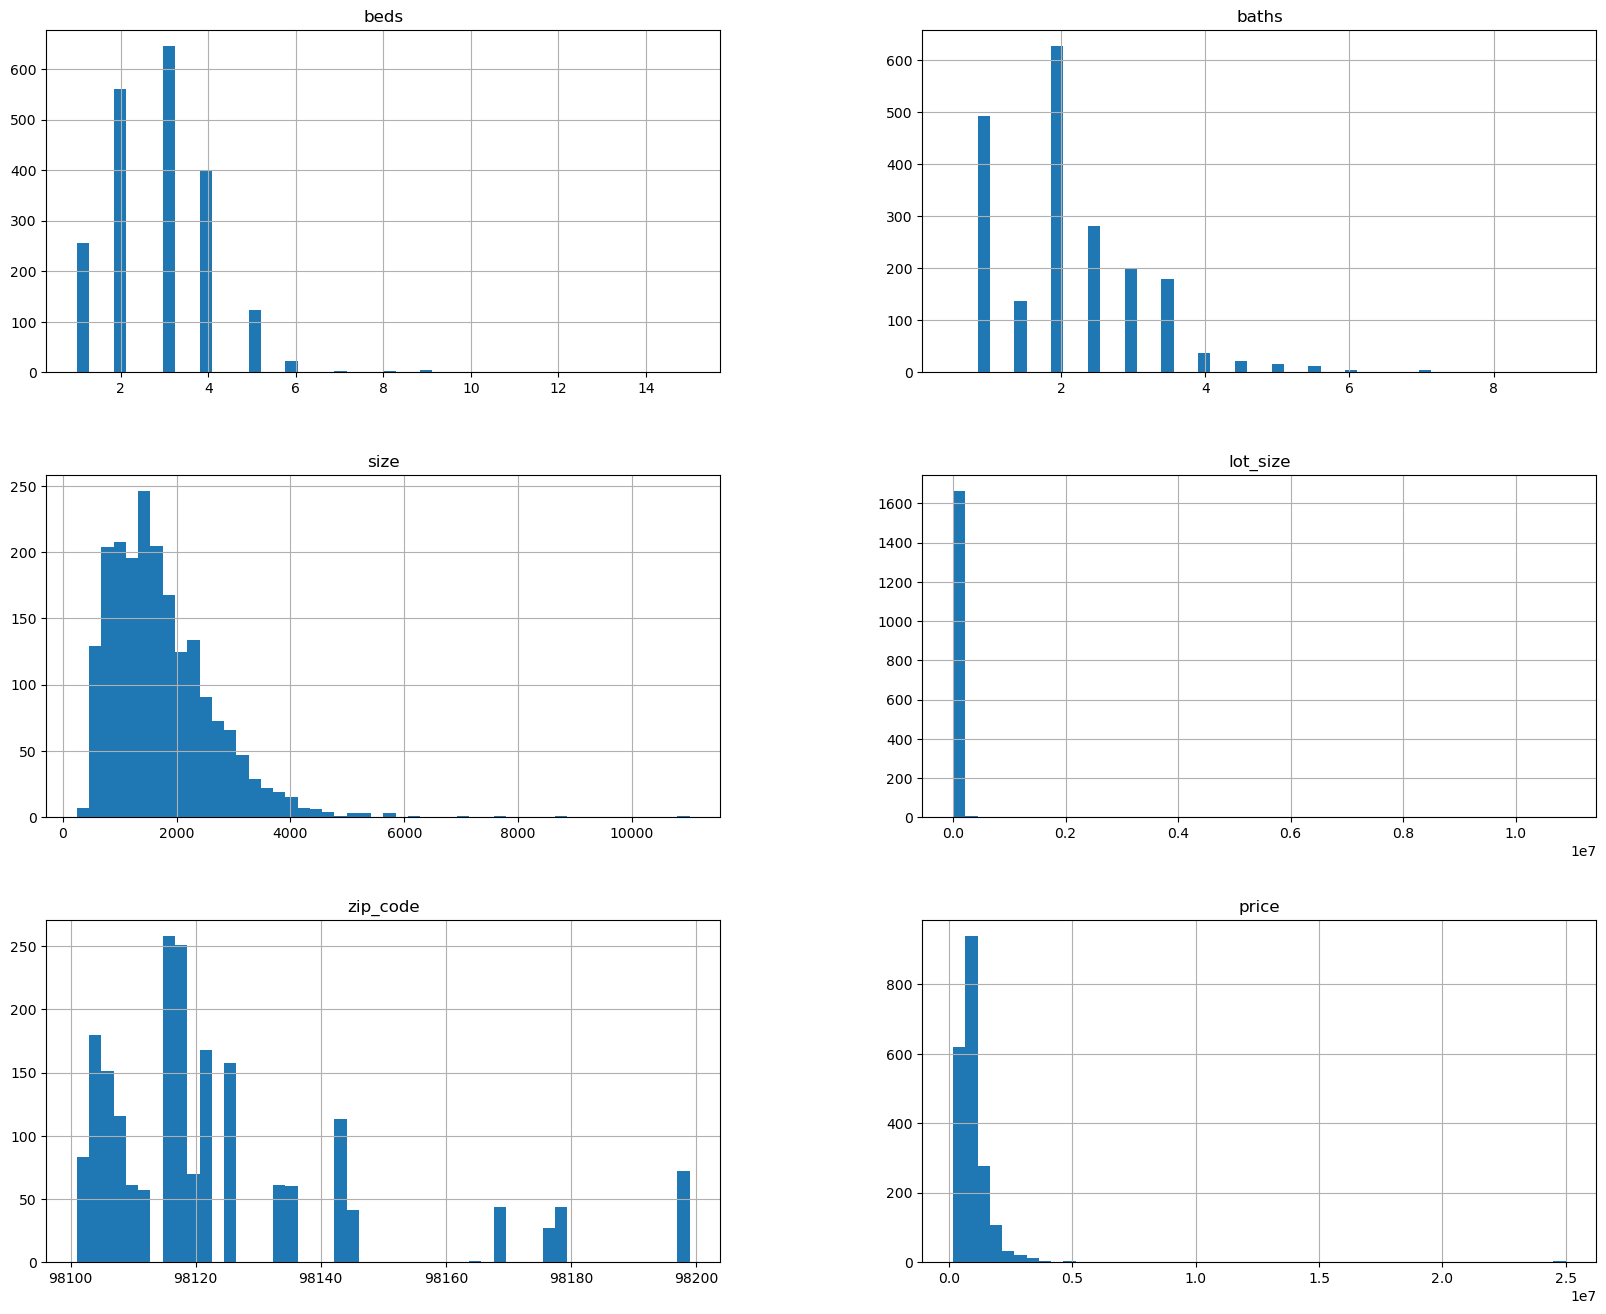

In [20]:
df_train.hist(bins=50, figsize=(20, 16))

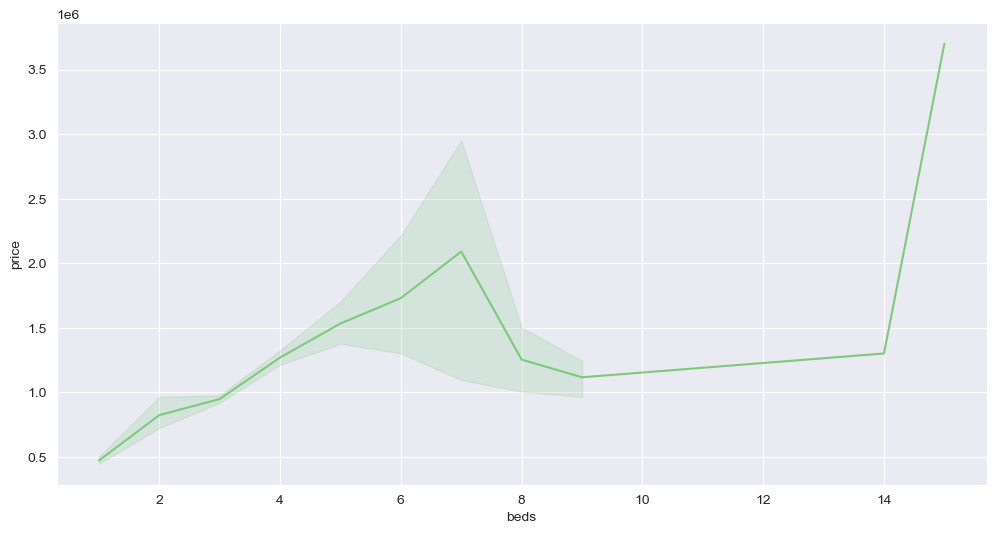

In [21]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='beds', y='price',data=df_train)
ax.figure.set_size_inches(12,6)

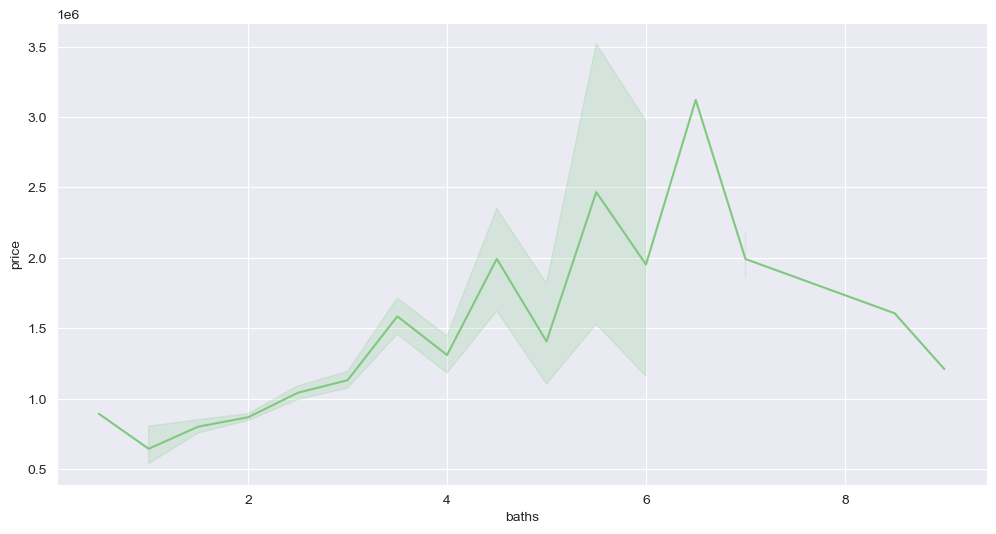

In [22]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='baths', y='price',data=df_train)
ax.figure.set_size_inches(12,6)

In [23]:
df_train = df_train.drop(['size_units', 'lot_size_units', 'zip_code'],axis = 1)
df_test = df_test.drop(['size_units', 'lot_size_units', 'zip_code'],axis = 1)

In [24]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [25]:
variaveis = ['beds', 'baths','size','lot_size']
variaveis

['beds', 'baths', 'size', 'lot_size']

In [26]:
x = df_train[variaveis]
x

,beds,baths,size,lot_size
0,3,2.5,2590.0,6000.0
1,4,2.0,2240.0,13503.6
2,4,3.0,2040.0,3783.0
3,4,3.0,3800.0,5175.0
5,2,2.0,1190.0,43560.0
...,...,...,...,...
2009,3,3.5,1680.0,1486.0
2010,2,2.0,1400.0,14810.4
2011,3,2.0,1370.0,21780.0
2013,4,2.0,2140.0,6250.0


In [27]:
y = df_train['price']
y

0        795000.0
1        915000.0
2        950000.0
3       1950000.0
5        740000.0
          ...    
2009     675000.0
2010     699950.0
2011     910000.0
2013    1150000.0
2015     659000.0
Name: price, Length: 1669, dtype: float64

In [28]:
x_prev = df_test[variaveis]
x_prev

,beds,baths,size,lot_size
0,3,3.0,2850.0,4200.0
1,4,5.0,3040.0,5002.0
2,3,1.0,1290.0,6048.0
3,3,2.0,2360.0,12196.8
4,3,3.5,1942.0,1603.0
...,...,...,...,...
500,5,4.5,5580.0,13068.0
501,3,2.5,1390.0,1570.0
502,3,2.5,2950.0,20473.2
503,5,5.0,3010.0,4887.0


In [29]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x, y)
pred = decision_tree.predict(x_prev)
acc_decision_tree = round(decision_tree.score(x, y) * 100, 2)
acc_decision_tree

98.98